In [157]:
#pip install seaborn
# pip install -U matplotlib

In [158]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
import pandas as pd
dataset= pd.read_csv('D:\Downloads\dataset\dataset\cancerdata.csv')
dataset.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [160]:
dataset.shape

(340, 32)

In [161]:
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [162]:
# dataset['diagnosis'].replace(['M','B'],[1,0],inplace=True)
# dataset.diagnosis

C:\Users\Swaraj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

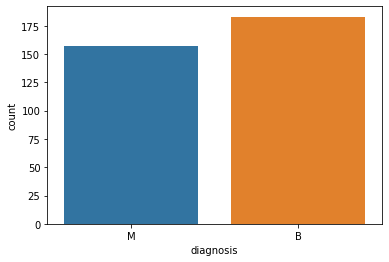

In [163]:
sns.countplot(dataset['diagnosis'],label ="count")

<AxesSubplot:>

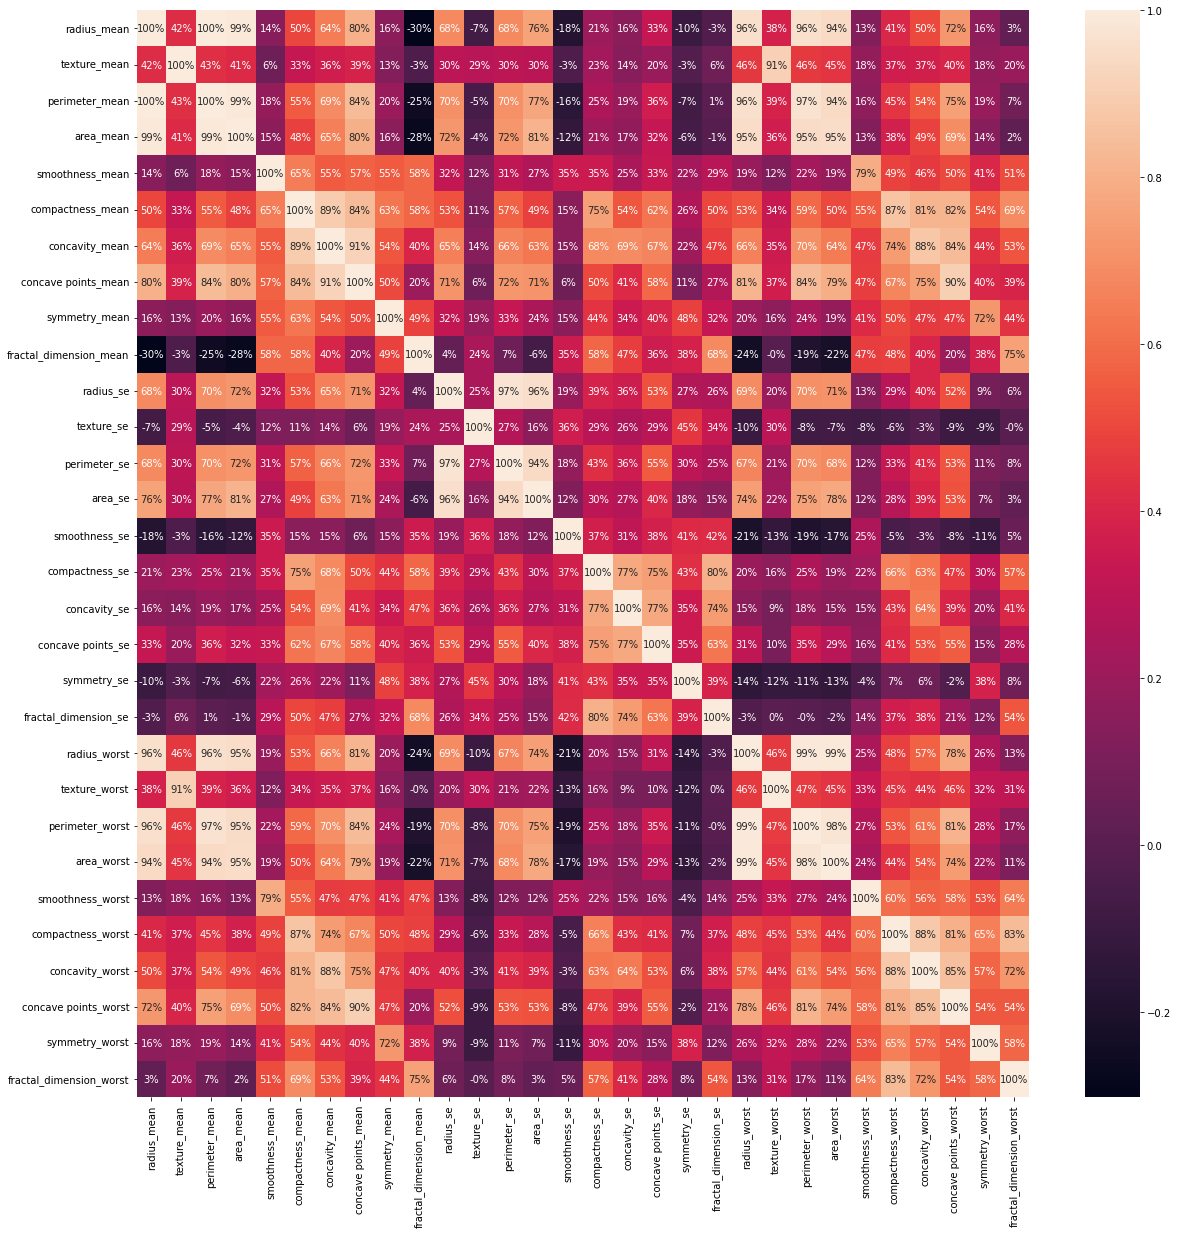

In [164]:
#plot correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(dataset.iloc[:,1:32].corr(), annot=True, fmt='.0%')

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,recall_score
from sklearn.metrics import confusion_matrix

In [166]:
y = dataset.diagnosis                     
list = ['id','diagnosis']
X = dataset.drop(list,axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [167]:
# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

C:\Users\Swaraj\AppData\Local\Temp\ipykernel_19300\680029985.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [168]:
to_drop

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [169]:
X = X.drop(X[to_drop], axis=1)
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [170]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y= labelencoder_Y.fit_transform(y)
# print(labelencoder_Y.fit_transform(y))

In [171]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [172]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectFromModel, RFE
sel_chi2 = SelectKBest(chi2, k=10)    # selected 10 features
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)
print(sel_chi2.get_support())

[ True  True False  True  True  True False False  True False False False
 False False False False  True False  True  True  True False False]


In [173]:
model_logistic = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=17)
model_logistic.fit(X_train_chi2, y_train)
X_test_chi2 = sel_chi2.transform(X_test)
predict = model_logistic.predict(X_test_chi2)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print("\nAccuracy Score using LogisticRegression Model :",accuracy_score(y_test,predict))
print("\nRecall Score using LogisticRegression Model :",recall_score(y_test,predict))
print()

[[39  2]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.93      0.96      0.95        27

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.95        68
weighted avg       0.96      0.96      0.96        68


Accuracy Score using LogisticRegression Model : 0.9558823529411765

Recall Score using LogisticRegression Model : 0.9629629629629629



In [174]:
# Create first pipeline for base without reducing features.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
# Create logistic regression
#logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.arange(0, 1, 0.001)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(model_logistic, hyperparameters, cv=5, scoring=ftwo_scorer, verbose=0)

In [175]:
# Fit grid search
best_model = clf.fit(X_train_chi2, y_train)
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.786


C:\Users\Swaraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Swaraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Swaraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1528, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\Swaraj\AppData\Local\Programs\Python

In [176]:
predictions = best_model.predict(X_test_chi2)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("\nAccuracy Score using LogisticRegression Model :",accuracy_score(y_test,predictions))
print("\nRecall Score using LogisticRegression Model :",recall_score(y_test,predictions))
print()

[[39  2]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.93      1.00      0.96        27

    accuracy                           0.97        68
   macro avg       0.97      0.98      0.97        68
weighted avg       0.97      0.97      0.97        68


Accuracy Score using LogisticRegression Model : 0.9705882352941176

Recall Score using LogisticRegression Model : 1.0



In [177]:
y_scores = best_model.predict_proba(X_test_chi2)[:, 1]

In [178]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [189]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    print(classification_report(y_test, y_pred_adj))
    print('Recall Score-',recall_score(y_test, y_pred_adj))

In [190]:
precision_recall_threshold(p, r, thresholds, 0.6073)

     pred_neg  pred_pos
neg        40         1
pos         0        27
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.96      1.00      0.98        27

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68

Recall Score- 1.0


In [181]:
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [182]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [183]:
from sklearn.preprocessing import StandardScaler, RobustScaler
rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X_test = rc.transform(X_test)

In [184]:
# Define a function which trains models
def models(X_train,y_train):
    
  
  #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)

  #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)

  #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)

  #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    #print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    #print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
    return log, svc_lin, svc_rbf, tree, forest

In [185]:
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.9742647058823529
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9852941176470589
[2]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9779411764705882
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 0.9963235294117647


In [186]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ',i)
  #Check precision, recall, f1-score
    print(classification_report(y_test, model[i].predict(X_test)))
  #Another way to get the models accuracy on the test data
    print("Accuracy -",accuracy_score(y_test, model[i].predict(X_test)))
    print("Recall -",recall_score(y_test, model[i].predict(X_test)))
    print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.90      1.00      0.95        27

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.95        68
weighted avg       0.96      0.96      0.96        68

Accuracy - 0.9558823529411765
Recall - 1.0

Model  1
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.90      0.96      0.93        27

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

Accuracy - 0.9411764705882353
Recall - 0.9629629629629629

Model  2
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.93      1.00      0.96        27

    accuracy                           0.97        6